# Chapter 2 Bike Data Cleanup

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('tmp/Bike-Sharing-Dataset')




In [2]:
bikes_hour_df_raw = pd.read_csv('tmp/Bike-Sharing-Dataset/hour.csv')
bikes_day_df_raw = pd.read_csv('tmp/Bike-Sharing-Dataset/day.csv')

In [3]:
bikes_hour_df_raw.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

### Remove Uneeded Features

In [4]:
bikes_hour_df = bikes_hour_df_raw.drop(['casual','registered'], axis=1)

In [6]:
bikes_hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1

In [7]:
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [9]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

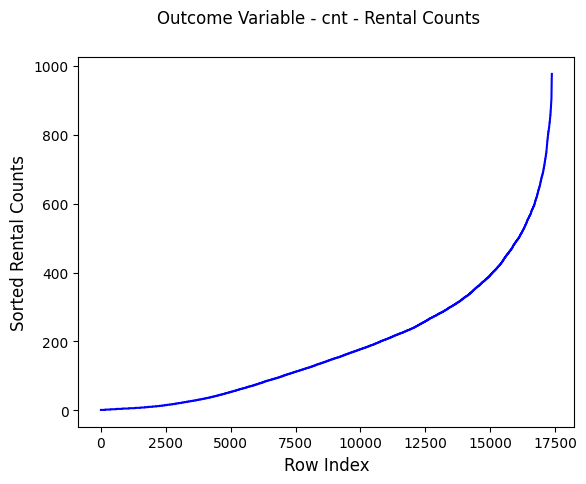

In [17]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']), color='blue')
ax.set_xlabel("Row Index", fontsize=12)
ax.set_ylabel("Sorted Rental Counts", fontsize=12)
ax.set_ylabel("Sorted Rental Counts", fontsize=12)
fig.suptitle('Outcome Variable - cnt - Rental Counts')
plt.show()

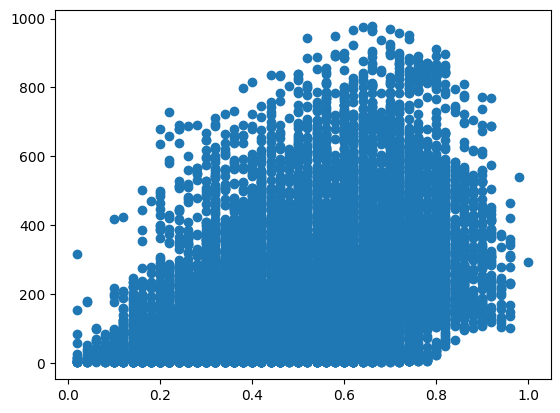

In [28]:
fig = plt.scatter(bikes_hour_df['temp'],bikes_hour_df['cnt'])
plt.show()

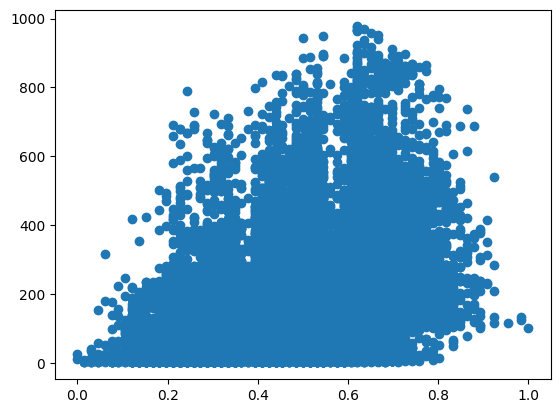

In [29]:
fig = plt.scatter(bikes_hour_df['atemp'],bikes_hour_df['cnt'])
plt.show()

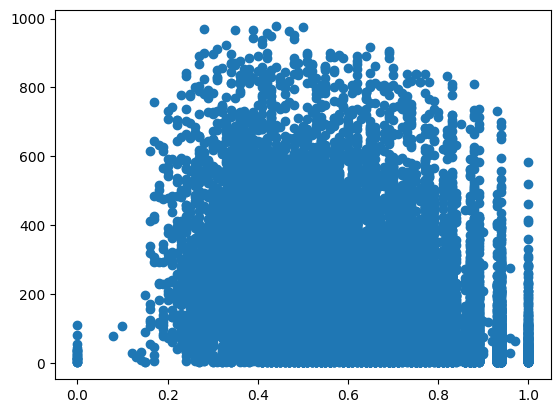

In [30]:
fig = plt.scatter(bikes_hour_df['hum'],bikes_hour_df['cnt'])
plt.show()

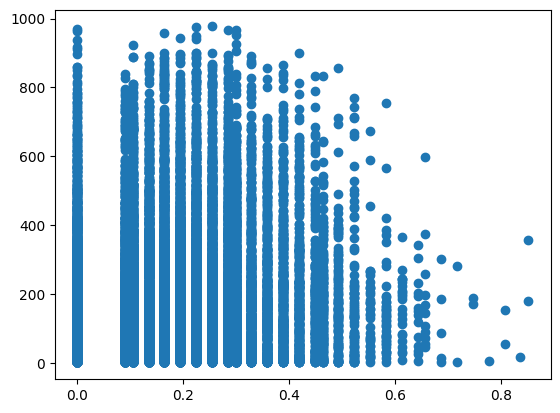

In [31]:
fig = plt.scatter(bikes_hour_df['windspeed'],bikes_hour_df['cnt'])
plt.show()

In [33]:
bikes_hour_df['season'].describe()

count    17379.000000
mean         2.501640
std          1.106918
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: season, dtype: float64

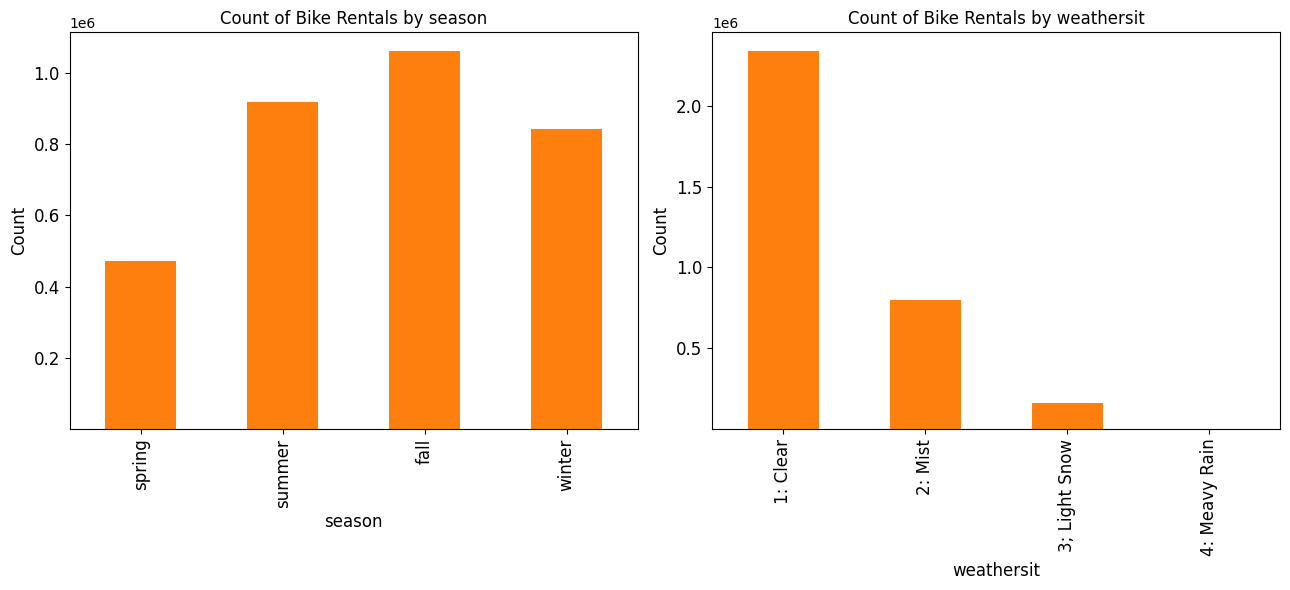

In [35]:
f, (ax1, ax2) =plt.subplots(nrows=1,ncols=2, figsize=(13, 6))
ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
    legend = False, title = 'Count of Bike Rentals by season',
    stacked =True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','summer','fall','winter'])
 
ax2 = bikes_hour_df[['weathersit', 'cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',
    legend = False, title = 'Count of Bike Rentals by weathersit',
    stacked =True, fontsize=12, ax=ax2)
ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3; Light Snow','4: Meavy Rain'])
 
 
f.tight_layout()

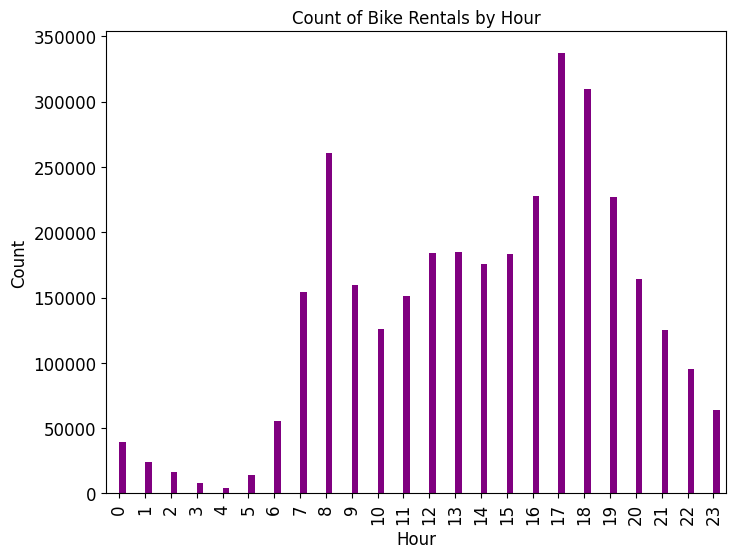

In [36]:
ax = bikes_hour_df[['hr', 'cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8,6),
                                                                                 legend = False, title = 'Count of Bike Rentals by Hour',
                                                                                 color = 'purple', fontsize=12)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

In [37]:
bikes_hour_df = bikes_hour_df_raw.drop(['casual','registered','atemp'], axis=1)

# Create two sets of data one for fitting and one for test

In [47]:
bike_df_model_ready = bikes_hour_df.copy()

outcome = 'cnt'
excludes = ['instant', 'dteday', outcome]
features = [feat for feat in list(bike_df_model_ready) if feat not in excludes]

# features = []
# for feat in list(bike_df_model_ready):
#     if feat not in excludes:
#         features.append(feat)
print(features)


['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']


In [54]:
x_train, x_test, y_train, y_test = train_test_split(bike_df_model_ready[features],
                                                    bike_df_model_ready[outcome],
                                                    test_size=0.3,
                                                    random_state=42)

from sklearn import linear_model
model_lr = linear_model.LinearRegression()
model_lr.fit(x_train, y_train)

predictions = model_lr.predict(x_test)

predictions[0:5]

array([459.79784454, 209.99408496,  60.25240658, 385.05143146,
       -14.05311475])

### Evaluate the data

In [55]:
y_test.values[0:5]

array([425,  88,   4, 526,  13])

In [56]:
error = sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', round(error, 2))

Root Mean Squared Error: 139.31


# Example of using the model

In [63]:
today = x_test.iloc[0]
today
 

season         3.000
yr             1.000
mnth           6.000
hr            19.000
holiday        0.000
weekday        6.000
workingday     0.000
weathersit     1.000
temp           0.800
hum            0.270
windspeed      0.194
Name: 12830, dtype: float64

In [62]:
prediction_for_today = model_lr.predict([today])[0]
print('Prediction for first recod in test set:', round(prediction_for_today, 2))

Prediction for first recod in test set: 459.8
